## <center> Modeling Urban Crime Dynamics : The Role of Spatial Diffusion and Pattern Formation

## Introduction 
Urban crime encompasses a wide range of illegal activities occurring in cities, from petty theft to violent offenses. The unique dynamics of urban environments—high population density, economic disparities, and social diversity—often create conditions conducive to crime. Understanding the causes and effects of urban crime is essential for developing strategies to combat it effectively.

Several factors contribute to the prevalence of crime in cities. Socioeconomic inequality is a major driver; poverty and unemployment push individuals toward criminal behavior as a means of survival or to bridge economic gaps. Additionally, high population density in urban areas can provide anonymity for offenders, making it easier for them to evade detection. Social disorganization, characterized by weak community ties and ineffective law enforcement, further exacerbates the problem. Lastly, limited access to education and opportunities leaves many individuals vulnerable to criminal influences.

The consequences of crime are far-reaching. Economically, it increases public spending on law enforcement, the judicial system, and rehabilitation programs, while simultaneously discouraging investments and tourism. Socially, high crime rates erode trust within communities, leading to fear, isolation, and weakened social cohesion. On an individual level, victims of crime often experience psychological trauma, which can have lasting effects on their well-being. This is where, thanks to data, mathematics can help.

___

### How can Mathematics help us understand Criminal Activity?

Mathematics provides powerful tools to analyze, model, and predict criminal activity. By translating complex social interactions and behavioral patterns into quantitative frameworks, it allows researchers and policymakers to uncover insights that can guide effective interventions.

Understanding the dynamics of urban crime is a complex yet critical challenge. Mathematical models provide a valuable framework for studying the interactions between non-criminal individuals ($N_p$) and criminal individuals ($C_p$), offering insights into the factors driving criminal activity and the effectiveness of various interventions. Predator-prey models, commonly used in ecological studies, have been adapted to describe these interactions, where criminals act as “predators” and non-criminals as “prey.” These models allow researchers to analyze equilibrium points, stability, and bifurcation phenomena, providing a foundation for understanding how populations evolve over time.

In particular, incorporating spatial effects into these models adds a new dimension to the analysis. The inclusion of **self-diffusion terms**, which represent random movement within each population, and **cross-diffusion terms**, where the movement of one population is influenced by the presence of the other, enables the study of spatial pattern formation. Such patterns can offer insights into the distribution of criminal activity and the effectiveness of law enforcement strategies in specific regions. 
Experimental evidence has highlighted the importance of cross-diffusion, which can induce spatial instability even in cases where self-diffusion alone does not.

This project builds upon a classical predator-prey framework by introducing diffusion terms to study the spatial and temporal dynamics of $N_p$ and $C_p$. Through linear stability analysis, **we aim to explore how spatial diffusion influences pattern formation and modifies predictions compared to non-spatial models**. Understanding these dynamics is essential for designing effective policies to combat urban crime and ensure community safety.
___

In [21]:
#Import de toutes les librairies nécessaires à cette analyse
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib import animation
from matplotlib.animation import PillowWriter
%matplotlib inline
import random
from sympy import *


In order to try modelise these patterns in an urban area, we propose the following model :

    
$\begin{equation}
    \begin{cases}
      \frac{\partial N_p}{\partial t} = \mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} + \gamma_{11}\Delta N_p + \gamma_{12}\Delta C_p \\
      \frac{\partial C_p}{\partial t} = - \gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p + \gamma_{21}\Delta N_p + \gamma_{22}\Delta C_p
    \end{cases}\,
\end{equation}
$

Where 𝜇, 𝑎, 𝑏, 𝛾, 𝜎, 𝐾, and 𝐿𝐶 

are positive variables, with:

- $𝑁𝑝$: The density of the non-criminal population.  
- $𝐶𝑝$: The density of the criminal population.  
- $𝜇$: The growth rate of the non-criminal population in the absence of the criminal population 𝐶𝑝.  
- $𝑎$: The maximum predation rate, i.e., the rate of consumption/victimization of 𝑁𝑝 by 𝐶𝑝.  
- $𝛾$: The mortality rate of 𝐶𝑝 in the absence of the non-criminal population 𝑁𝑝.  
- $𝑏$: The conversion rate of the 𝑁𝑝 population into the 𝐶𝑝 population.  
- $𝜎$: The half-saturation constant for the Holling function defined as:  

  $𝑓(𝑁𝑝) = \frac{N_p}{𝜎 +N_p}$

Thus, 𝐶𝑝𝑓 represents the total consumption by all 𝐶𝑝 individuals of the resource 𝑁𝑝 (conversion rate of non-criminal individuals into criminal individuals).


$\gamma_{21},\gamma_{22}, \gamma_{11}, \gamma_{12}$ are coefficients for diffusion terms. 

As both $C_p$ and $N_p$ are present in the two equations, this system is a cross-diffusion reaction system.
___


# Goal of the study :

The study of those equations generating Turing Patterns will be divided into two main studies (sections) :

Firstly, we will try to study those equations without the cross-diffusion effect (removing the last two terms from each equations).
Then we will study the system with its cross-diffusion effect.

##  1) System without cross-diffusion effect

In this first part, only the temporal dynamics will be considered. thus We define $N_p : t \rightarrow N_p(t)$ the density of the non-criminal population, and $C : t \rightarrow C_p(t)$ the density of the criminal population

Here, we are trying to study the following system :

$$
    \begin{cases}
      \frac{dN_p}{dt} = \mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p}\\
      \frac{dC_p}{dt} = - \gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p 
    \end{cases}\,
$$


## 1.1) Dynamics of the system

Here we are trying to determine what interpretation can be made out of those equations :

When $N_p = 0$ (2) Becomes :

$$
    \begin{cases}
      \frac{dN_p}{dt} = 0\\
      \frac{dC_p}{dt} = - C_p(\gamma + L_C)
    \end{cases}\,
$$

The differential equation $\frac{\partial C_p}{\partial dt} = - C_p(\gamma + L_C)$ can be simply solved by functions such that :
$C_p(t) = Ke^{-t(L_C + \gamma)}$

Thus the population of criminal when non-criminal aren't present is destined to go extinct ($\underset{t \rightarrow + \infty}{lim}Ke^{-t(L_C + \gamma)} = 0$)

When $C_p = 0$ (2) Becomes :

$$
    \begin{cases}
      \frac{d N_p}{dt} = \mu ( 1 - \frac{N_p}{K})N_p\\
      \frac{d C_p}{dt} = 0
    \end{cases}\,
$$

The equation representing the $N_p$ population is a logistic equation. Thus the population of non criminal when the criminal population is absent will grow up to it's capacity limit $K$(depending on the inital conditions, which means $N_p \neq 0$)

We can thus clearly established that the relationship between $N_p$ and $C_p$ is a prey-predator :

- $N_p$, the population of non-criminal is considered as the prey whereas $C_p$ the population of criminals are the predators

## 1.2) Equilibrium points and stability

It is now proposed to establish the fixed points and then determine their stability :

This will take place in two parts :
Firstly, the fixed points will be determined thanks to calculations and then verified with computation (using python)


We are searching for points such that :

$$
    \begin{cases}
      \frac{dN_p}{dt} = 0\\
      \frac{dC_p}{dt} = 0
    \end{cases}\,
$$

Thus : 

$$\begin{cases}
      \mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} = 0\\
    - \gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p = 0
  \end{cases}\,$$

Which can be transformed into : 

$\begin{equation}
    \begin{cases}
      \mu N_p( 1 - \frac{N_p}{K})N_p - \frac{a C_p N_p}{\sigma + N_p} = 0\\
    C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C) = 0
    \end{cases}\,
\end{equation}
$

The system isn't valid for : $N_p = -\sigma$ (Which is logic as $N_p$ represent a population and cannot be negative) \
Thus, from now on, we will assume that : $N_p \neq -\sigma$

Let's try to find equilibrium points starting : $C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C) = 0$

We get that : 

$$ C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C) = 0 \Leftrightarrow C_p = 0 \ or \  - \gamma + b \frac{N_p}{\sigma + N_p} - L_C  = 0$$

And : 

$$- \gamma + b \frac{N_p}{\sigma + N_p} - L_C  = 0 \Leftrightarrow N_p = \frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)}$$

Thus :
$$\gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p = 0  \Leftrightarrow C_p = 0 \ ou \ N_p = \frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)} \tag{A}$$

Using these results, we will try to find equilibrium points thanks to the second equation :

### **Using** $C_p = 0$ and $N_p \neq -\sigma$ :

The first equation of (5) can be simplified to : $\mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p}$ which becomes : $\mu ( 1 - \frac{N_p}{K})N_p$ as stated previously when trying to determine the dynamics of the system.

We thus get that :

$$ \mu ( 1 - \frac{N_p}{K})N_p = 0 \Leftrightarrow N_p = 0 \ or \ Np = K$$

Thus, we get 2 equilibrium points : 
$$ (0,0), (0,K)$$

### **Using** $N_p = \frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)}$ and $\gamma, \sigma , L_c > 0$ 

We get that : $\mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p}$ can be simplfied to $\mu ( 1 - \frac{N_p}{K}) - a \frac{C_p}{\sigma + N_p}$ 

By isolating $C_p$, we get that :

$$ \mu ( 1 - \frac{N_p}{K}) - a \frac{C_p}{\sigma + N_p} = 0 \Leftrightarrow C_p = \frac{\mu \sigma}{a}(1 - \frac{N_p}{K})(1 + \frac{N_p}{\sigma}), \ avec \ N_p = \frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)} $$

This was verified thanks to a python program given below :


In [59]:

gama, Lc, b, sigma, mu, a, K = symbols('gamma Lc b sigma mu a K', constant = True)
Cp, Np = symbols('Cp Np')

# On vérifie le point fixe (Np*, Cp*) particulié que l'on a trouvé pour les deux équations :
dCp_dt = ((-gama) * Cp) + (b * (Np * Cp) / (sigma + Np)) - (Lc * Cp)
dNp_dt = (mu * ((1 - Np / K)*Np)) - a * ((Np * Cp) / (sigma + Np))

# On pose les valeurs de notre point fixe :
Np_val = (sigma*(gama + Lc)/(b-(gama + Lc)))
Cp_val = (mu/a) * (1 - (Np_val/K)) * (sigma + Np_val)

# On pose (Np*, Cp*) pour dCp/dt:
dCp_dt_Cp_0 = dCp_dt.subs(Cp, Cp_val)
dCp_dt_Pt_fixe = dCp_dt_Cp_0.subs(Np, Np_val)

# De même pour dNp/dt :
dNp_dt_Cp_0 = dNp_dt.subs(Cp, Cp_val)
dNp_dt_Pt_fixe = dNp_dt_Cp_0.subs(Np, Np_val)

# à l'aide de .simplify() on simplfie l'expression pour bien vérifier qu'elle nous donne 0
simplified_resultC = simplify(dCp_dt_Pt_fixe)
simplified_resultN = simplify(dNp_dt_Pt_fixe)

print("Pour le point fixe (Np*,Cp*) = ({},{}), on a que : dCp/dt = {} et dNp/dt = {}".format(Np_val,Cp_val, simplified_resultC, simplified_resultN))

# De même pour le point (0,0)
Np_val = 0
Cp_val = 0

dNp_dt_Cp_0 = dNp_dt.subs(Cp, Cp_val)
dNp_dt_Pt_fixe = dNp_dt_Cp_0.subs(Np, Np_val)

simplified_resultC = simplify(dCp_dt_Pt_fixe)
simplified_resultN = simplify(dNp_dt_Pt_fixe)

print("Pour le point fixe (Np*,Cp*) = ({},{}), on a que : dCp/dt = {} et dNp/dt = {}".format(Np_val,Cp_val, simplified_resultC, simplified_resultN))

# De même pour le point (K,0)
Np_val = K
Cp_val = 0

dNp_dt_Cp_0 = dNp_dt.subs(Cp, Cp_val)
dNp_dt_Pt_fixe = dNp_dt_Cp_0.subs(Np, Np_val)


simplified_resultC = simplify(dCp_dt_Pt_fixe)
simplified_resultN = simplify(dNp_dt_Pt_fixe)

print("Pour le point fixe (Np*,Cp*) = ({},{}), on a que : dCp/dt = {} et dNp/dt = {}".format(Np_val,Cp_val, simplified_resultC, simplified_resultN))


Pour le point fixe (Np*,Cp*) = (sigma*(Lc + gamma)/(-Lc + b - gamma),mu*(1 - sigma*(Lc + gamma)/(K*(-Lc + b - gamma)))*(sigma*(Lc + gamma)/(-Lc + b - gamma) + sigma)/a), on a que : dCp/dt = 0 et dNp/dt = 0
Pour le point fixe (Np*,Cp*) = (0,0), on a que : dCp/dt = 0 et dNp/dt = 0
Pour le point fixe (Np*,Cp*) = (K,0), on a que : dCp/dt = 0 et dNp/dt = 0


Thus we get , thanks to the second equation of $(2)$, three equilibrium points which are :

$$(N_p^*,C_p^*) \in \{(0,0), (K,0), (\frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)},\frac{\mu}{a}(1 - \frac{N_p^*}{K})(\sigma+ N_p^*)) \}$$

Let's find the remaining equilibrium points (if there are) starting from : $\mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} = 0$

We get that :

$$\mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} = 0 \Leftrightarrow N_p ( \mu (1 - \frac{N_p}{K}) - \frac{a C_p}{\sigma + N_p}) = 0$$

Thus : 

$$ N_p ( \mu (1 - \frac{N_p}{K}) - \frac{a C_p}{\sigma N_p}) = 0 \Leftrightarrow N_p = 0 \ or \ C_p = \frac{\mu}{a}(1-\frac{N_p}{K})(\sigma + N_p)$$

### **Using** $N_p = 0$ **and that** $\gamma, L_c > 0$

We get that : $C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C)$ now becomes : $C_p(- \gamma - L_C)$

Thus giving us : $N_p = 0 \Rightarrow C_p = 0$ which was already found previously


### **Using** $C_p = \frac{\mu}{a}(1-\frac{N_p}{K})(N_p + \sigma)$ :

We are now trying to find $N_p$ such that : $C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C) = 0$

Because $C_p \neq 0$:

$$C_p(- \gamma + b \frac{N_p}{\sigma + N_p} - L_C) = 0 \Leftrightarrow (-\gamma + b \frac{N_p}{\sigma + N_p} - L_c) = 0$$

We then have three cases :

- $N_p = 0 \Rightarrow C_p = 0$ due to its expression, which is a point we already found.

- $N_p = K \Rightarrow C_p = 0$ due to the expression of the term $C_p$, which is also a point we found before 

- $(-\gamma + b \frac{N_p}{\sigma + N_p} - L_c) = 0 \Rightarrow N_p = \frac{\sigma(\gamma + L_c)}{b- (\gamma + L_c)}$

Which are the three equilibrium points found before.


Thus we get that :

$$\begin{cases}
      \mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} = 0\\
    - \gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p = 0
    \end{cases}\,
 \Leftrightarrow (N_p^*,C_p^*) \in  \{(0,0), (K,0), (\frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)},\frac{\mu}{a}(1 - \frac{N_p^*}{K})(\sigma + N_p^*)) \}$$

# 1.3) Stability of our equilibrium points

**First attempt**

We consider :

$$
    \begin{cases}
      \frac{dN_p}{dt} = f(t)\\
      \frac{dC_p}{dt} = g(t)
    \end{cases}\, 
$$

Our jacobian matrix will be as such :

$$\begin{pmatrix}
    \frac{df}{dN_p} & \frac{df}{dC_p} \\
    \frac{dg}{dN_p} & \frac{dg}{dC_p}
 \end{pmatrix}$$

We have that :

$$
\begin{cases}
\frac{df}{dN_p} = \mu (1 - 2 \frac{N_p}{K}) - a \frac{\sigma C_p}{(\sigma + N_p)^2}\\
\frac{df}{dC_p} = \frac{-a N_p}{\sigma + N_p} \\
\frac{dg}{dN_p} = \frac{b C_p (\sigma + N_p) - N_pC_p}{(\sigma + N_p)^2} \\
\frac{dg}{dC_p} = -\gamma + b \frac{N_p}{\sigma N_p} - L_c \\
\end{cases} $$

Giving us the following Jacobian matrix :

$$ \begin{pmatrix}
    \mu (1 - 2 \frac{N_p}{K}) - a \frac{\sigma C_p}{(\sigma + N_p)^2} & \frac{-a N_p}{\sigma + N_p} \\
    \frac{b C_p \sigma}{(\sigma + N_p)^2} & -\gamma + b \frac{N_p}{\sigma + N_p} - L_c
\end{pmatrix} $$

### 1) **Study of** (0,0) **equilibrium point**

For the equilibria $(0,0)$, we get that : 

$$J^*_{(0,0)} = 
\begin{pmatrix} 
\mu & 0 \\
0 & - \gamma - L_c
\end{pmatrix}
$$

Thus : 
$$ 
  \begin{cases} 
    tr(J^*_{(0,0)}) = \mu - \gamma - L_c   \\ 
    det(J^*_{(0,0)}) = - \mu (\gamma + L_c) \end{cases} 

$$

To ensure our point's stability, we have to fulfill the following conditions :
$$
\begin{cases} 
  det(J) > 0 \\
  tr(J) < 0
\end{cases} \ \ \text{With J the jacobian matrix evaluated at the equilibrium point}
$$

However, $\mu, \gamma, L_c > 0$ thus $det(J^*_{(0,0)})$ cannot be negative. 

**Therefore,** $(0,0)$ **is always unstable.**

### 2) **Study of** (K,0) **equilibrium point**

We have that : 

$$J^*_{(K,0)} = \begin{pmatrix} - \mu & \frac{-aK}{\sigma + K} \\ 0 & \frac{b}{\sigma} - (\gamma + L_c)\end{pmatrix}$$

Moreover : $$\begin{cases} tr(J^*_{(K,0)}) = -\mu + \frac{b}{\sigma} - (\gamma + L_c) \\ det(J^*_{(K,0)}) = - \mu (\frac{b}{\sigma} - \gamma + L_c)\end{cases}$$

Therefore, in order for $(K,0)$ to be stable, we need :

$$\begin{cases} tr(J^*_{(K,0)})  < 0 \Rightarrow L_c > \frac{b}{\sigma} - \mu - \gamma \\ det(J^*_{(K,0)}) > 0 \Rightarrow L_c > - \gamma + \frac{b}{\sigma} \end{cases}$$

### 3) **Study of** $(N_p^*,C_p^*)$ **equilibrium point**

This equilibria is trickier, as it requires heavy computation (The computation won't be used for the next steps as it will explain below). In order to try and get result, simpy was used to compute and simplify the expressions.

In [20]:
Np_val = (sigma*(gama + Lc)/(b-(gama + Lc)))
Cp_val = (mu/a) * (1 - (Np_val/K)) * (sigma + Np_val)

df_dN = mu * (1 - 2 * (Np_val/K)) - a * ((sigma * Cp_val)/((sigma + Np_val)**2))
df_dC = (-a * Np_val) / (sigma + Np_val)
dg_dN = (b * Cp_val * sigma) / ((sigma + Np_val)**2)
dg_dC = -gama + b* (Np_val/(sigma * Np_val)) - Lc

print("Simplfied expression of the coefficient at the top left corner of the Jacobian matrix : {}".format(simplify(df_dN)))
print("Simplfied expression of the coefficient at the top right corner of the Jacobian matrix : {}".format(simplify(df_dC)))
print("Simplfied expression of the coefficient at the bottom left corner of the Jacobian matrix : {}".format(simplify(dg_dN)))
print("Simplfied expression of the coefficient at the bottom right corner of the Jacobian matrix : {}".format(simplify(dg_dC)))

Simplfied expression of the coefficient at the top left corner of the Jacobian matrix : mu*(b*(K*(Lc - b + gamma) + 2*sigma*(Lc + gamma)) + (K*(Lc - b + gamma) + sigma*(Lc + gamma))*(Lc - b + gamma))/(K*b*(Lc - b + gamma))
Simplfied expression of the coefficient at the top right corner of the Jacobian matrix : -a*(Lc + gamma)/b
Simplfied expression of the coefficient at the bottom left corner of the Jacobian matrix : -mu*(K*(Lc - b + gamma) + sigma*(Lc + gamma))/(K*a)
Simplfied expression of the coefficient at the bottom right corner of the Jacobian matrix : -Lc + b/sigma - gamma


Thus, giving us the following Jacobian matrix : 

$$J_ {(N_p^*,C_p^*)} = \begin{pmatrix} 
\mu\frac{(b(K(L_c - b + \gamma) + 2\sigma(L_c + \gamma)) + (K(L_c - b + \gamma) + \sigma(L_c + \gamma))(L_c - b + \gamma))}{(Kb(L_c - b + \gamma))} & -a\frac{(L_c + \gamma)}{b} \\
-\frac{\mu(K(L_c - b + \gamma) + \sigma(L_c + \gamma))}{(Ka)} & -L_c + \frac{b}{\sigma} - \gamma
\end{pmatrix}$$

## 1.4) Conclusion on the stability of the Equilibrium point for the system without diffusion terms
However, in order to be able to continue our analysis and do the simulations as well as prevent any errors comming from the analysis of this matrix, we used the conditions given by the paper. These conditions were obtained by using Routh-Hurwitz conditions and by ignoring the non-linear terms in $\frac{dN}{dt}$ and $\frac{dC}{dt}$.

Those conditions can be summed up to :

$$(0,0) \ \text{is always unstable (as we found during our studies)}$$
$$(K,0) \ \text{is stable if} \ L_c > - \gamma + \frac{Kb}{K + \sigma} \ \text{which is slightly different from what we found above}$$
$$(N_p^*, C_p^*)\ : \text{If we assume that} \ (\gamma + L_c) < \frac{Kb}{K + \sigma}, \ \text{then} \ E^* \ \text{exists and it is stable if} \ L_c > - \gamma + \frac{Kb}{K + 2 \sigma} \ \text{while it is unstable if} \ L_c < - \gamma + \frac{Kb}{K + 2 \sigma}. \ \text{An Hopf bifurcation occurs when :} \ L_c = - \gamma + \frac{Kb}{K + 2 \sigma}$$

# 2) Analysis of the system with cross-diffusion

When considering self and cross diffusion terms, the system becomes :

$$
    \begin{cases}
      \frac{\partial N_p}{\partial t} = \mu ( 1 - \frac{N_p}{K})N_p - a \frac{N_p C_p}{\sigma + N_p} + \gamma_{11}\Delta N_p + \gamma_{12}\Delta C_p \\
      \frac{\partial C_p}{\partial t} = - \gamma C_p + b \frac{N_p C_p}{\sigma + N_p} - L_CC_p + \gamma_{21}\Delta N_p + \gamma_{22}\Delta C_p
    \end{cases}\,

    \ \ \ \ \

    (x,t) \in \Omega \times \mathbb{R^+}
$$

Here, both spatial and temporal dynamics are considered and studied : 

Here N_p and C_p are function such that : $N_p : (x,t) \rightarrow N_p(x,t)$ and $C_p : (x,t) \rightarrow C_p(x,t)$

We linearize the system in the neighborhood of the Equilibrium point and we obtain the following :

$$\frac{\partial}{\partial t} \begin{pmatrix} N_p \\ C_p\end{pmatrix} = J \begin{pmatrix} N_p \\ C_p\end{pmatrix}  + D \Delta \begin{pmatrix} N_p \\ C_p\end{pmatrix} $$

With J = the jacobian matrix previously calculated :

$$ J = \begin{pmatrix}
    \mu (1 - 2 \frac{N_p}{K}) - a \frac{\sigma C_p}{(\sigma + N_p)^2} & \frac{-a N_p}{\sigma + N_p} \\
    \frac{b C_p \sigma}{(\sigma + N_p)^2} & -\gamma + b \frac{N_p}{\sigma N_p} - L_c
\end{pmatrix} $$

and D, the matrix of diffusion coefficients

$$\begin{pmatrix}
  \gamma_{11} & \gamma_{12} \\
  \gamma_{21} & \gamma_{22} \\
\end{pmatrix}$$

With : $\gamma_{11}, \gamma_{22}$ : self-diffusion coefficients

and : $\gamma_{12}, \gamma_{21}$ : cross-diffusion coefficients

We are looking for solutions for $N_p$, $C_p$ of this form :

$$\begin{cases} N_p = \alpha e^{\lambda t + i k x} \\ C_p = \beta e^{\lambda t + i k x} \end{cases}\ \ \ (k \in \mathbb{R^2})$$

To correctly define the system, we need the following conditions :

- Initial Conditions : $$N_p(x,0) = N_0(x), C_p(x,0) = C_0(x) \ \ avec \ \ x \in \Omega$$
- Neumann Conditions : 
$$ \vec{\Delta} \vec{N_p} \cdot \vec{n} = 0 \ \ \ \ \ \vec{\Delta} \vec{C_p} \cdot \vec{n} = 0 \ \ \ \ \ \text{with} \  x \in \partial \Omega \times \mathbb{R}^+ \ \text{frontier of }\ \Omega \ \text{and} \ \vec{n} \ \text{the normal unit vector exiting at the frontier} \ \partial \Omega \ \text{of} \ \Omega$$

We know that in abscence of diffusion, the stability conditions can be, as previously stated, summed up to :

$$
\begin{cases} 
  det(J) > 0 \\
  tr(J) < 0
\end{cases} \ \ \text{With J the jacobian matrix without diffusion evaluated at the equilibrium point}
$$

We got that :

$$\begin{cases} 
  N_p = \alpha e^{\lambda t + ikx} \\
  C_p = \beta e^{\lambda t + ikx}
\end{cases} \Leftrightarrow 
\begin{cases} 
  \frac{\partial^2 N_p}{\partial x^2} = -k^2 N_p \\
  \frac{\partial^2 C_p}{\partial x^2} = - k^2 C_p
\end{cases}
$$


Thus :

$$ \frac{\partial}{\partial t} \begin{pmatrix} N_p \\ C_p \end{pmatrix} = J \begin{pmatrix} N_p \\ C_p \end{pmatrix} - k^2 D \begin{pmatrix} N_p \\ C_p \end{pmatrix}$$

Thus giving us $J_D$ such that :

$$ \frac{\partial}{\partial t} \begin{pmatrix} N_p \\ C_p \end{pmatrix} = (J- k^2D) \begin{pmatrix} N_p \\ C_p \end{pmatrix}, \ \ \ \ J_D = (J- k^2D) $$

Thus, the new stability conditions are :

$$ \begin{cases} Tr(J-k^2D) < 0 \\ det(J-k^2D) > 0\end{cases}$$

## 2.2) Study of the equilibrium points stability
We wish to study the effect of diffusion on the stability of the equilibrium points : 

$$ E_0 = (0,0), E_1 = (K,0), E_3 = (N_p^*, C_p^*)$$

### 1) **Effect on** $E_0$:

In the abscenceof diffusion, we know that $E_0$ is unstable, let's look at what happens when we take into account the diffusion phenomena :

The  new Jacobian matrix evaluated at $E_0$ is :

$$
J_D(E_0) = 
\begin{pmatrix} 
  \mu - k^2\gamma_{11} & - k^2\gamma_{12} \\
  - k^2\gamma_{21} & -(\gamma + L_c) - k^2 \gamma_{22}
\end{pmatrix}
$$

Leading to the following conditions on the trace and determinant : 
$$Tr(J_0) < 0 \Leftrightarrow \mu < k^2 \gamma_{11} + (\gamma + L_c) + k^2 \gamma_{22} \\
det(J_0) > 0 \Leftrightarrow - (\mu - k^2 \gamma_{11})(\gamma + L_c + k^2\gamma_{22}) - k^4 \gamma_{12}\gamma_{21} > 0$$

Thus, we get that : $E_0$ is unstable in the absence of diffusion and becomes stabilized by the action of self and cross diffusion if and only if :

$$\begin{cases}
  k^2(\gamma_{11} + \gamma{22}) + (\gamma + L_c) > \mu \\
  - (\mu - k^2 \gamma_{11})(\gamma + L_c + \gamma_{22} - k^4 \gamma{12} \gamma{21}) > 0
  \end{cases}
$$

### 2) **Effect on** $E_1$:

In absense of diffusion, $E_1$ is stable when :

$$L_c > - \gamma + \frac{Kb}{K + \sigma}$$

In the presence of diffusion, the new Jacobian matrix evaluated at $E_1$ is :

$$ \begin{pmatrix}
  -\mu -k^2 \gamma_{11} & -a \frac{K}{\sigma + K} - k^2 \gamma_{12} \\
  -k^2 \gamma_{21} & - (\gamma + L_c) + \frac{bK}{\sigma + K} - k^2 \gamma_{22}
  \end{pmatrix}
$$

To get the stability of E_1, we have that :
$$Tr(J_0(E_1)) < 0 \Leftrightarrow - \mu - k^2 \gamma_{11} - (\gamma + L_c) - k^2 \gamma_{22} + \frac{bK}{\sigma + K} < 0$$

And knowing that :

$$ \mu + (\gamma + L_c) > \frac{bK}{\sigma + K} \Rightarrow (E_1) \ \ \text{stable (without diffusion)}$$

We get that : $Tr(J_D) < 0$ is verified

On the other hand :

$$ det(J_D(E_1)) > 0 \Leftrightarrow (\gamma_{11}\gamma_{22} - \gamma_{12}\gamma_{21})k^2 + [ \mu \gamma_{22}- \gamma_{11}(- \gamma -  L_c + \frac{bK}{k+ \sigma}) - \gamma_{21} \frac{aK}{k+\sigma} ] k^2 - \mu(-\gamma - L_c + \frac{bK}{\sigma + K}) < 0 \tag{*} $$


Thus $E_1$ is destabilized by diffusion if and only if (*) is satisfied.

We notice that : for (*) to be satisfied, it is necessary that $\gamma_{21}$ is positive. We can deduce that self diffusion alone does not induce instability.


### 3) **Effect on** $E_3$

In absence of diffusion, $E_3^*$ is unstable for $\gamma + L_c < \frac{K b}{K + 2 \sigma}$

In the presence of diffusion, the new Jacobian matrix evaluated at $E_3$ is :

$$J_D(E_3) = \begin{pmatrix} \mu(1-\frac{2N_p^*}{K}) - \frac{a C_p^* \sigma}{(\sigma + Np^*)^2} - k^2 \gamma_{11} & \frac{aN_p^*}{\sigma N_p^*} - k^2 \gamma_{12} \\
\frac{\sigma b C_p^*}{(\sigma + N_p^*)^2} - k^2 \gamma_{21} & - (\gamma + L_c) + \frac{b N_p^*}{\sigma + N_p^*} - k^2 \gamma_{22}
\end{pmatrix}$$

We then get that : 

$$\begin{cases} Tr(J_D(E_3)) < 0 \Rightarrow k^2(\gamma_{11} + \gamma_{22}) > \frac{Kb - (\gamma + L_c)(K + 2 \sigma)}{K(b-(\gamma + L_c))} \\
det(J_D(E_3)) > 0 \Rightarrow (\gamma_{11}\gamma_{22}-\gamma_{21}\gamma_{12})k^4 + Ak^2 + B > 0 \tag{**}
\end{cases} \\ $$

With : 
$$A = - \mu \frac{Kb - (\gamma + L_c)(K + 2 \sigma)}{K(b-(\gamma + L_c))} \gamma_{22} + \frac{\mu \gamma_{12}}{K} [Kb - (\gamma L_c)(K + \sigma)] - \frac{a \gamma_{21}}{b}(\gamma + L_c) \ \text{and} \ B = det(J(E_3))$$


Thus, we get that $E_3$ is stabilized by self and cross diffusion if and only if (**) is satisfied.


# Numerical simulation
## Implementation
The code for this simulation was inspired by the following repository : https://github.com/ijmbarr/turing-patterns.git

In [23]:
# This was put here as well just to ensure that the code launches, it will be explained below.
#des parametres de l'equation
mu= 8
a=  0.9
gamma = 0.23 
b= 0.95
sigma = 1
K = 6
Lc = 0.46

Np_etoil = sigma*(gamma+Lc)/(b-(gamma+Lc))
equi_points = np.array([[0.,0.],[K, 0.],[Np_etoil,mu * sigma* (1-Np_etoil/K)*(b/(b-(gamma+Lc)))/a]])

In [24]:
def laplacian2D(a, dx):
    return (- 4 * a+ np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
        + np.roll(a,+1,axis=1)
        + np.roll(a,-1,axis=1)
    ) / (dx ** 2)

In [25]:
def initialize_w_conditions(shape, N0=7.0, C0=5.0, domain_size=(40.0, 40.0)):
    """
    Initialize N_P and C_P based on the given conditions.

    Parameters:
        shape (tuple): Shape of the grid (nx, ny).
        N0 (float): Initial scaling factor for N_P.
        C0 (float): Initial scaling factor for C_P.
        domain_size (tuple): Size of the domain (Lx, Ly).

    Returns:
        tuple: Initialized arrays (N_P, C_P) of shape `shape`.
    """
    nx, ny = shape
    Lx, Ly = domain_size
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, ny)
    X, Y = np.meshgrid(x, y)
    
 
    
    centers = [(5,5),(5,20),(20,5),(20,20),(35,35),(20,35),(35,20),(35,5),(5,35)]
    P = np.zeros_like(X)
    for cx, cy in centers:
        P +=  np.exp(-((X - cx)**2 + (Y - cy)**2) / 10.0)
    
    # Initialize N and C
    N_P = N0 + P
    C_P = C0 + P
    
    

    return (N_P,C_P)

In [27]:
def random_initialiser(shape):
    return (
        np.random.normal(loc = 0, scale = 0.05 ,size = shape),
        np.random.normal(loc = 0, scale = 0.05 ,size = shape)
    )

def apply_neumann_boundary_conditions(array):
        # Top and bottom rows
        array[0, :] = array[1, :]       # Top boundary
        array[-1, :] = array[-2, :]     # Bottom boundary

        # Left and right columns
        array[:, 0] = array[:, 1]       # Left boundary
        array[:, -1] = array[:, -2]     # Right boundary

        return array
class TwoDimensionalRDEquations():
    def __init__(self, Da, Db, Ra, Rb,
                 initialiser=random_initialiser,
                 cross_diffusion = False,
                 width=1000, height=1000,
                 dx=1, dt=0.1, steps=1):
        """
        
        :param Da (int or tuple): if cross_diffusion is True, tuple else int
        :param Db (int or tupel): if cross_diffusion is True, tuple else int 
        :param Ra (funciton): Reaction term of a
        :param Rb (func): Reaction term of b 
        :param initialiser: 
        :param cross_diffusion: 
        :param width: 
        :param height: 
        :param dx: 
        :param dt: 
        :param steps: 
        """
        self.Da = Da
        self.Db = Db
        self.Ra = Ra
        self.Rb = Rb
        
        self.cross_diff = cross_diffusion
        self.initialiser = initialiser
        self.width = width
        self.height = height
        self.shape = (width, height)
        self.dx = dx
        self.dt = dt
        self.steps = steps
        
    def initialise(self):
        self.t = 0
        self.a, self.b = self.initialiser(self.shape)
        
    def update(self):
        for _ in range(self.steps):
            self.t += self.dt
            self._update()

    def _update(self):
        
        # unpack so we don't have to keep writing "self"
        if self.cross_diff: #Da1, Da2, Db1, Db2 corresponding to gamma 11, gamma 21 ,gamma 12, gamma 22
            a,b,(Da1,Da2),(Db1,Db2),Ra,Rb,dt,dx = (
                self.a, self.b,
                self.Da, self.Db,
                self.Ra, self.Rb,
                self.dt, self.dx
            )
        else:
            a,b,Da,Db,Ra,Rb,dt,dx = (
                self.a, self.b,
                self.Da, self.Db,
                self.Ra, self.Rb,
                self.dt, self.dx
            )
        
        La = laplacian2D(a, dx)
        Lb = laplacian2D(b, dx)
        
        if self.cross_diff:
            delta_a = dt * (Da1 * La+ Db1 * Lb + Ra(a,b))
            delta_b = dt * (Da2 * La + Db2 * Lb + Rb(a,b))
        else:
            delta_a = dt * (Da * La + Ra(a,b))
            delta_b = dt * (Db * Lb + Rb(a,b))
        
        self.a += delta_a
        self.b += delta_b
        
        self.a = apply_neumann_boundary_conditions(self.a)
        self.b = apply_neumann_boundary_conditions(self.b)
        
    def draw(self, fig, ax):
        ax[0].clear()
        ax[1].clear()

        non_crime = ax[0].imshow(self.a, cmap='jet')
        crime = ax[1].imshow(self.b, cmap='jet',interpolation="none")
        
        ax[0].grid(visible=False)
        ax[1].grid(visible=False)
        
        ax[0].set_title("Non-criminal, t = {:.2f}".format(self.t))
        ax[1].set_title("Criminal, t = {:.2f}".format(self.t))
        
        fig.colorbar(non_crime, ax=ax[0],location='right',shrink = 0.75)
        fig.colorbar(crime,ax=ax[1],location='right',shrink = 0.75)
        
    
    def plot_evolution_concrete(self, n_steps ,character = "noncrim"):
        self.initialise()
        step_plot = n_steps // 9
        fig, axes = plt.subplots(3, 3, figsize=(10, 10))
        for i in range(n_steps):
            self.update()
            
            if i % step_plot == 0 and i <step_plot*9:
                ax = axes.flat[i // step_plot]
                ax.clear()
                axe = ax.imshow(self.a, cmap = "jet")
                ax.grid()
                ax.set_title("Non-crim, t = {:.2f}".format(self.t))
        plt.colorbar(axe,ax = axes[:,:],shrink = 0.75)
                    
    def plot_evolution_animation(self,filename, n_steps): #in dev
        self.initialise()
        fig, ax =plt.subplots()
        def step(t):
            self.update()
            self.draw_noncrim(ax)
        
        anim = animation.FuncAnimation(fig, step, frames=np.arange(n_steps), interval=20)
        pillow_writer = PillowWriter(fps=10)
        anim.save(filename=filename, writer = pillow_writer,dpi = 60)
        plt.close()
    
    def plot_evolution_outcome(self, filename, n_steps):
        """
        Evolves and save the outcome of evolving the system for n_steps
        """
        self.initialise()
        fig, ax = self.initialise_figure()
        
        for _ in range(n_steps):
            self.update()

        self.draw(fig,ax)
        fig.savefig(filename)
        # plt.close()    
    
    def phase_portrait(self, fixed_point = None):        
        fig,ax = plt.subplots()
        x = np.linspace(0, 20, 100)
        y = np.linspace(0, 20,100)
        X, Y =np.meshgrid(x, y)
        
        Xdot = self.Ra(X,Y)
        Ydot = self.Rb(X,Y)
        
        ax.streamplot(x,y,Xdot,Ydot)
        if fixed_point is not None:
            ax.scatter(*fixed_point.T, color = 'r')
        else: 
            ax.scatter(*equi_points.T, color = 'r')
        
        ax.set_title("Phase portrait")
        fig.text(0.5, 0.04, 'Non-criminal', ha='center', va='center')
        fig.text(0.05, 0.5, 'Criminal', ha='center', va='center', rotation='vertical')

    
    def initialise_figure(self):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        return fig, ax
        

Let's first define the parameters of the equation first (according to the table given in the article)

In [28]:
#des parametres de l'equation
mu= 8
a=  0.9
gamma = 0.23 
b= 0.95
sigma = 1
K = 6
Lc = 0.46

By using the analysis above, we define the equilibrium points for the portrait phase :

$$(N_p^*,C_p^*) \in \{(0,0), (K,0), (\frac{(\sigma + L_c) \gamma}{b - (\gamma + L_c)},\frac{\mu}{a}(1 - \frac{N_p^*}{K})(\sigma+ N_p^*)) \}$$

In [29]:
Np_etoil = sigma*(gamma+Lc)/(b-(gamma+Lc))
equi_points = np.array([[0.,0.],[K, 0.],[Np_etoil,mu * sigma* (1-Np_etoil/K)*(b/(b-(gamma+Lc)))/a]])

We will simulate for the 2 possible of the diffusion terms: self-diffusion and cross-diffusion

In [30]:
def RN(N,C): return mu*(1-N/K)*N-a*N*C/(sigma+N)
def RC(N,C): return -gamma*C + b*N*C/(sigma+N) - Lc*C

In [31]:
#self-diffusion and cross-diffusion
Da_self = 2.0
Db_self = 2.0

## Le portrait de phase

In [32]:
criminal_pde_self = TwoDimensionalRDEquations(
    Da_self, Db_self, RN, RC, 
    width=100, height=100,
    dx=1, dt=0.01, steps=100
)

In [33]:
criminal_pde_self = TwoDimensionalRDEquations(
    Da_self, Db_self, RN, RC,initialiser=initialize_w_conditions, 
    width=200, height=200,
    dx=1, dt=0.01, steps=100
)

Here we have the portrait phase according to the parameters : 

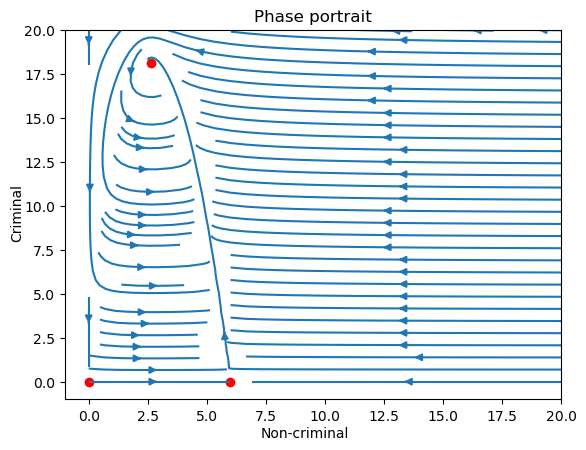

In [34]:
criminal_pde_self.phase_portrait(equi_points)

## Simulation with self-diffusion

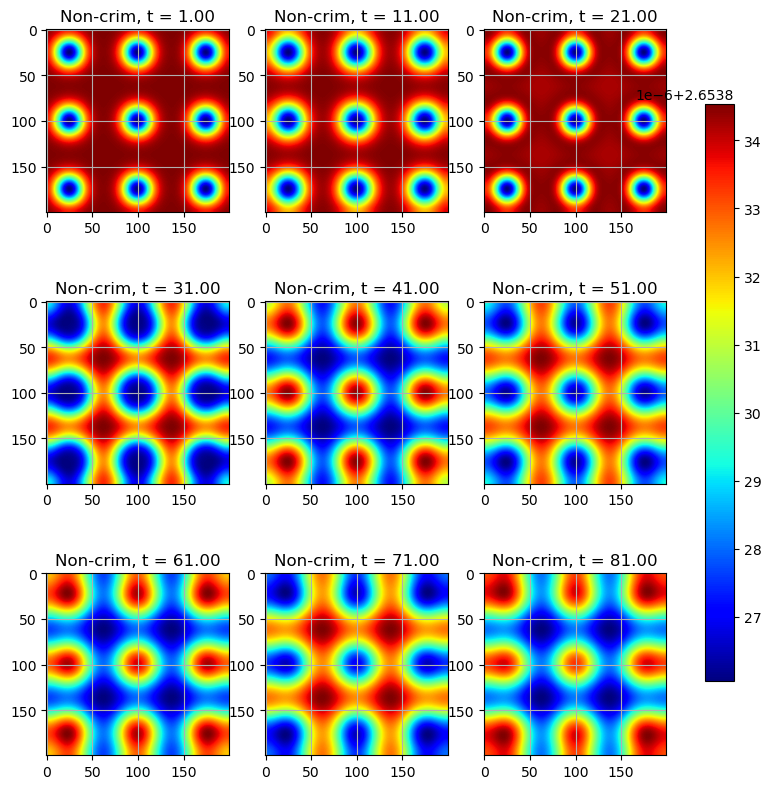

In [35]:
criminal_pde_self.plot_evolution_concrete(n_steps=90)

With only self-diffusion, we observe that, after the expansion of the criminal population, both population seem to attain a stable pattern from which they are switching places, meaning that the criminal and non-criminal population move (criminals toward non-criminals and non-criminals away from the criminals) without ever blending.

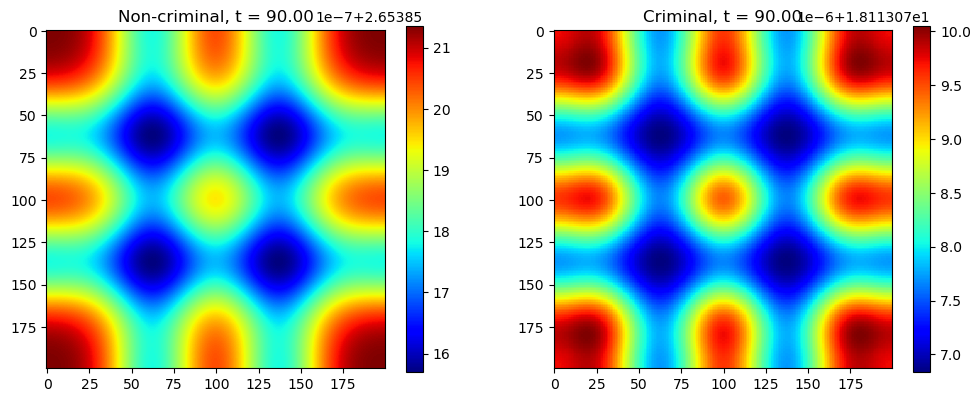

In [36]:
criminal_pde_self.plot_evolution_outcome("criminal_self_diffus.png", n_steps=90)

## Simulation with crossed diffusion

The result obtained from the simulation have been registered in the images below :
$$\gamma_{11} = 0.3 $$ 
$$\gamma_{12} = -0.8$$
$$\gamma_{21} = -0.1$$
$$\gamma_{22} = 0.5$$

In [37]:
Da_cross = (0.3,-0.1)
Db_cross = (-0.8,0.5)

In [38]:
criminal_pde_cross = TwoDimensionalRDEquations(
    Da_cross,Db_cross,RN,RC,
    width=200, height=200,
    initialiser=initialize_w_conditions,
    cross_diffusion= True,
    dx=1, dt=0.01, steps=100
)

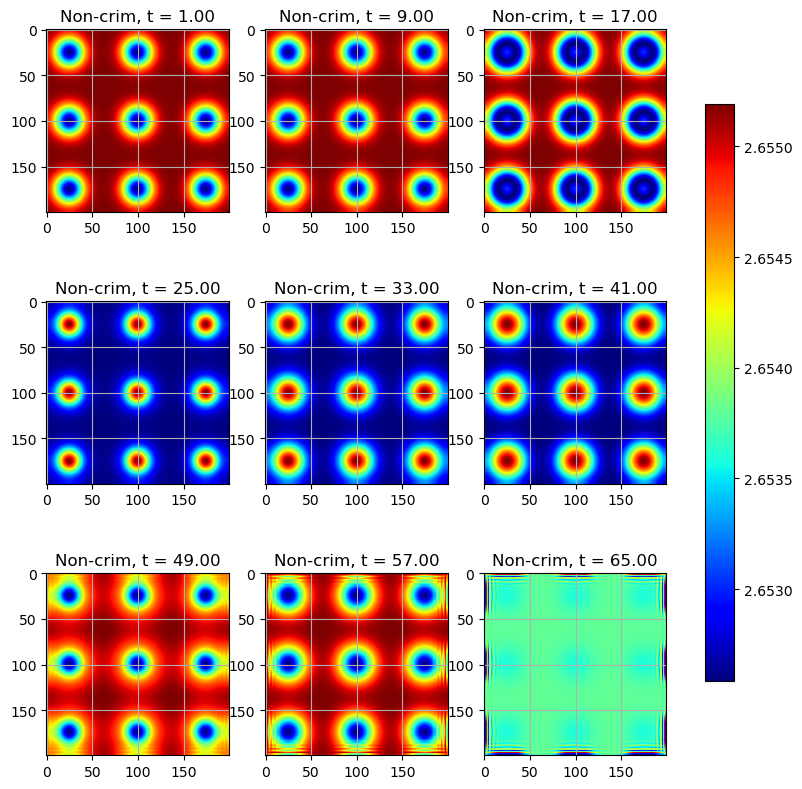

In [39]:
criminal_pde_cross.plot_evolution_concrete(n_steps=80)

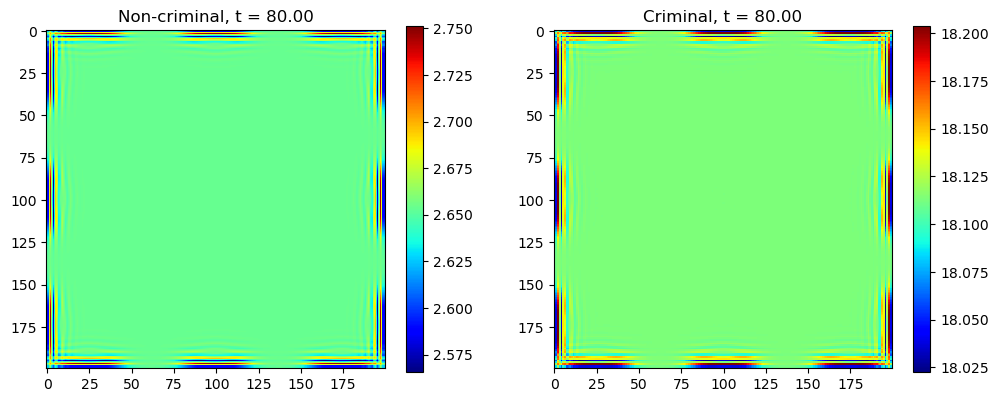

In [40]:
criminal_pde_cross.plot_evolution_outcome("criminal_cross1.png",n_steps=80)

The population from both populations are propagating, then become homogeneous. The parameters $\gamma_{12}$ et $\gamma_{21}$ become negative, indicating the tendancy of the criminals to go towards the non-criminals, and the non-criminals to run from them.

The diffusions terms have then been augmented.
$$\gamma_{11} = 2 $$ 
$$\gamma_{12} = -3$$
$$\gamma_{21} = -1$$
$$\gamma_{22} = 2$$

In [41]:
Da_cross = (2.0,-1.0)
Db_cross = (-3.0,2.0)

In [42]:
criminal_pde_cross = TwoDimensionalRDEquations(
    Da_cross,Db_cross,RN,RC,
    width=200, height=200,
    initialiser=initialize_w_conditions,
    cross_diffusion= True,
    dx=1, dt=0.01, steps=100
)

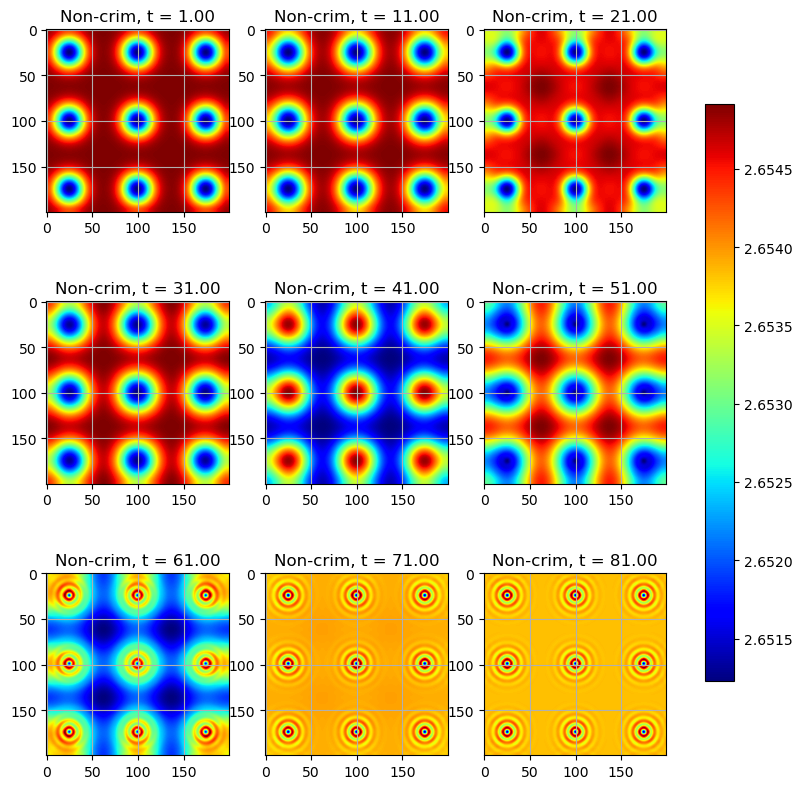

In [43]:
criminal_pde_cross.plot_evolution_concrete(n_steps=90)

Due to the slight superiority of $\gamma_{12}$ the final figure present more Non-criminal individual, with the criminal population confined to select areas (where they are also few). We could see those points as sort of "prisons" where those individuals are trapped in high concentration.

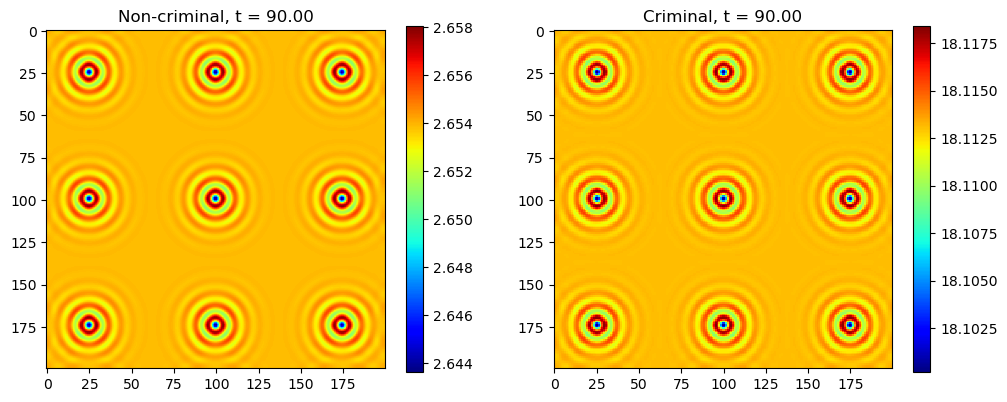

In [44]:
criminal_pde_cross.plot_evolution_outcome("criminal_cross1.png",n_steps=90)

We then tried with other parameters :
$$\gamma_{11} = 0.8 $$ 
$$\gamma_{12} = -5$$
$$\gamma_{21} = 3$$
$$\gamma_{22} = 2$$

In [45]:
Da_cross = (0.8,3)
Db_cross = (-5,2.0)

In [46]:
criminal_pde_cross = TwoDimensionalRDEquations(
    Da_cross,Db_cross,RN,RC,
    width=200, height=200,
    initialiser=initialize_w_conditions,
    cross_diffusion= True,
    dx=1, dt=0.01, steps=100
)

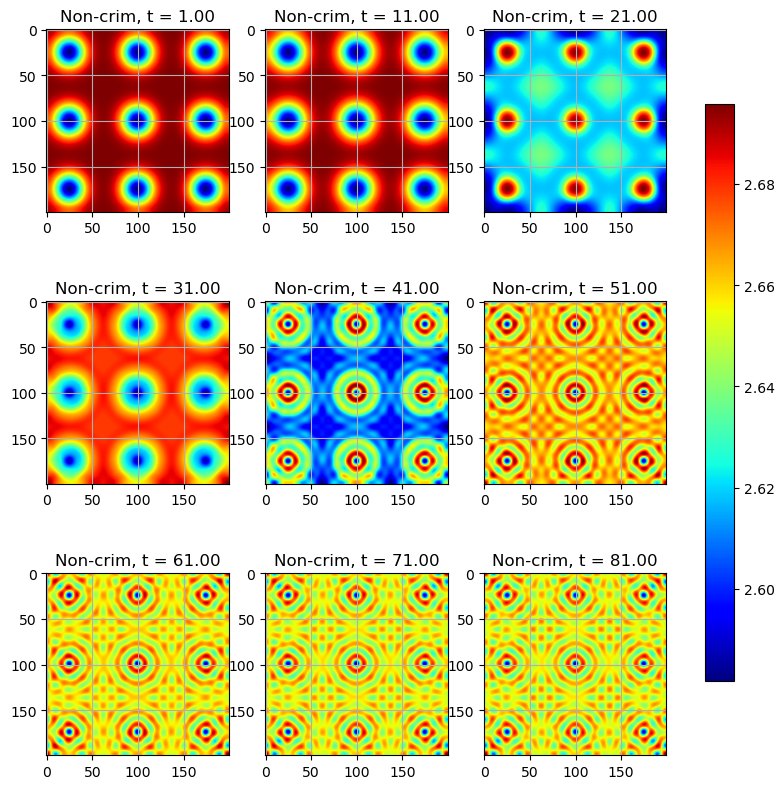

In [47]:
criminal_pde_cross.plot_evolution_concrete(n_steps=90)

Here we can observe the diffusion of the criminal population (blue dots at t = 1.00).

At first, the criminal population expand towards the non-criminal population living around them (giving us the Figure at t = 21.00)

This action seems to have reduce the Non-criminal population (as the figure at t = 31.00 is a lighter red).

From this point on, the populations seem  to blend in togeter, giving a sort of stable state as observed over 20 time steps. (From t = 61.00 to t = 81.00)

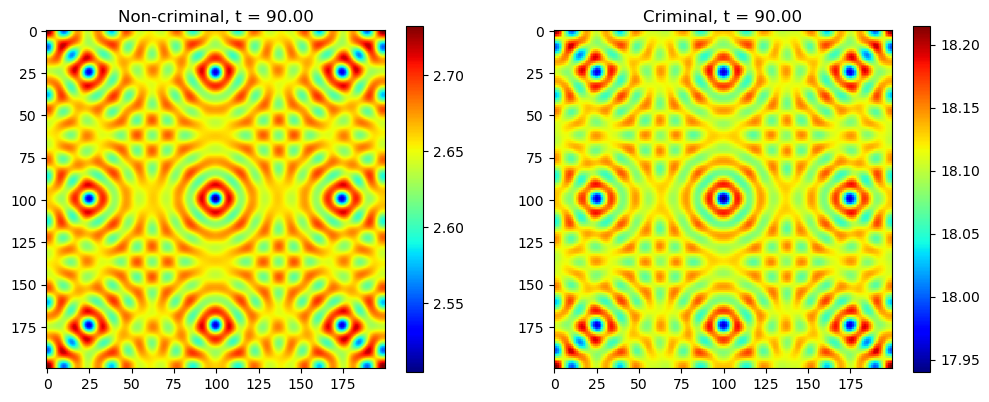

In [48]:
criminal_pde_cross.plot_evolution_outcome("criminal_cross2.png",n_steps=90)

In the two last pictures, the dispersions of individuals in the two population increase compared to the first one. We observe more regular patterns.

The parameters were changed again :
$$\gamma_{11} = 0.8 $$ 
$$\gamma_{12} = 1$$
$$\gamma_{21} = 3.9$$
$$\gamma_{22} = 2$$

In [49]:
Da_cross = (2.0,3.9)
Db_cross = (1,2.0)

In [50]:
criminal_pde_cross = TwoDimensionalRDEquations(
    Da_cross,Db_cross,RN,RC,
    width=200, height=200,
    initialiser=initialize_w_conditions,
    cross_diffusion= True,
    dx=1, dt=0.01, steps=100
)

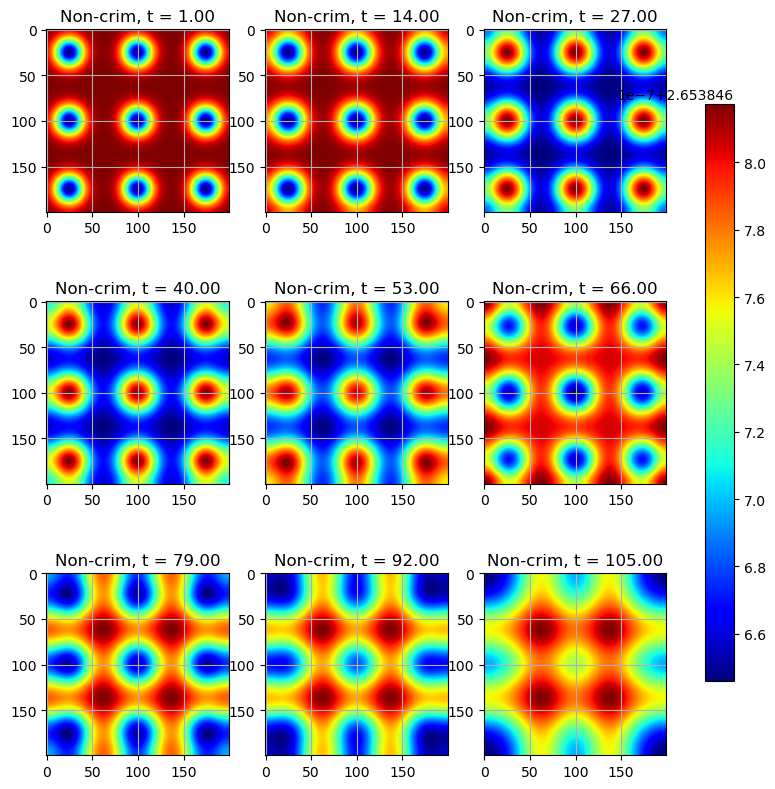

In [52]:
criminal_pde_cross.plot_evolution_concrete(n_steps=120)

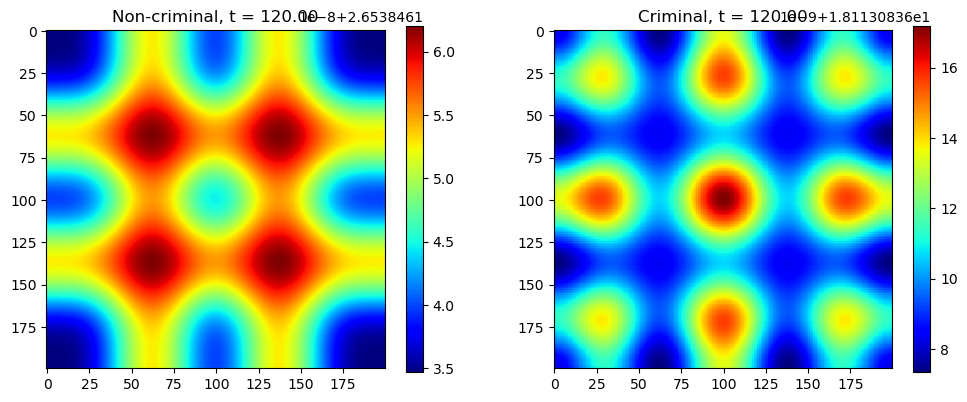

In [53]:
criminal_pde_cross.plot_evolution_outcome("criminal_cross3.png",n_steps=120)

Finally, choosing positive values for crossed-diffusion explains the fact that the non-criminal population gravitate toward the regions with low density in criminal individuals. This is interesting as this allows us to observe a concurrence of two phenomenon : The first one where non-criminal individual lives in regions without criminals. The second one, opposing the first, were Criminals and non-criminals are coexisting.

___
    
## Conclusion

  In this study, we explored a mathematical model that describes the interactions between a non-criminal-minded population and a criminal-minded population, incorporating the effects of both self-diffusion and cross-diffusion. The model is based on a generalized prey-predator system with a Holling Type II functional response, complemented by logistic growth terms and the influence of law enforcement efforts aimed at mitigating criminal activities. This approach provides a framework for studying the complex dynamics of social interactions in the presence of criminal behavior, offering insights into how various factors interact to influence population distributions and stability.

Our investigation focused on the identification and analysis of constant steady states, particularly those with significant social implications, such as total eradication of criminality or coexistence of both populations. We examined the linear stability of these steady states in relation to key model parameters, revealing the thresholds and conditions under which stability is maintained or lost. Additionally, we studied the role of diffusion processes, including self-diffusion, which accounts for the natural dispersal of individuals within a population, and cross-diffusion, which reflects how one population’s movement is influenced by the presence of another.

One of the notable contributions of this study is the demonstration of how cross-diffusion can induce complex phenomena, such as Turing instabilities, where stable equilibria under homogeneous conditions can become unstable in the presence of spatial heterogeneities. We established conditions under which such instabilities occur and analyzed how the interplay between diffusion coefficients and other parameters shapes the dynamics of the system. The theoretical findings were further supported by numerical simulations, which showcased diverse behaviors, including spatial pattern formation, oscillatory dynamics, and transitions between stable states.

This work highlights the critical role of diffusion mechanisms in shaping the stability and dynamics of interacting populations, particularly in social systems with criminal behaviors. By providing a deeper understanding of these interactions, the model can serve as a foundation for future studies aimed at devising strategies for crime prevention and social stability. Future research may focus on extending the model to include additional factors, such as temporal variations in law enforcement intensity, socioeconomic influences, or the impact of environmental factors, to further enhance its applicability and predictive power.